In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [32]:
boston_dataset = load_boston()  # type: ignore


c:\Users\Sulav Bhandari\.conda\envs\mlcc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [33]:
boston_dataset


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [34]:
dir(boston_dataset)


['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [35]:
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
boston_dataset.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [37]:
# Actual prices of houses in thousands
boston_dataset.target


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [38]:
# creating a dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
# adding price of houses (target) column in the dataframe
data["PRICE"] = boston_dataset.target


In [39]:
data.head()  # top 4 rows of the data


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [40]:
data.tail()  # bottom 4 rows of the data


CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [41]:
data.info()  # data cleanup checking for any missing and null element


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Data visuallsing


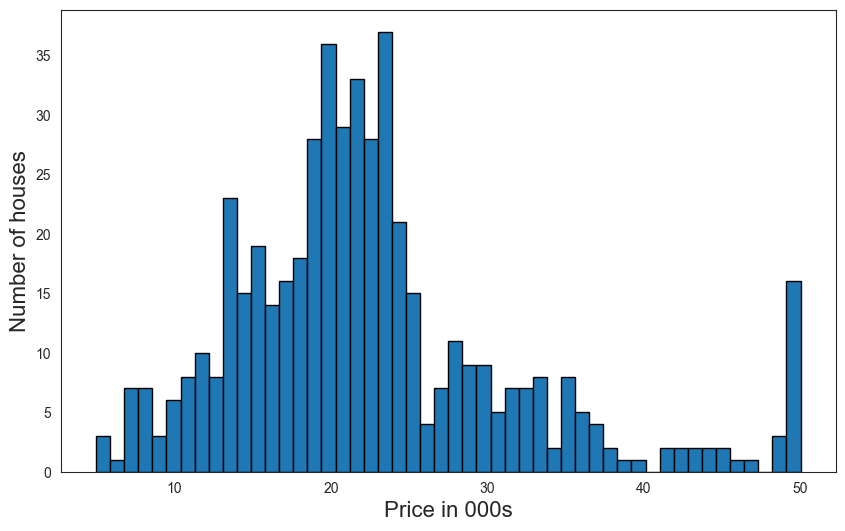

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(data["PRICE"], bins=50, ec="black")


plt.xlabel("Price in 000s", fontsize=16)
plt.ylabel("Number of houses", fontsize=16)
plt.show()


<Figure size 1000x600 with 0 Axes>

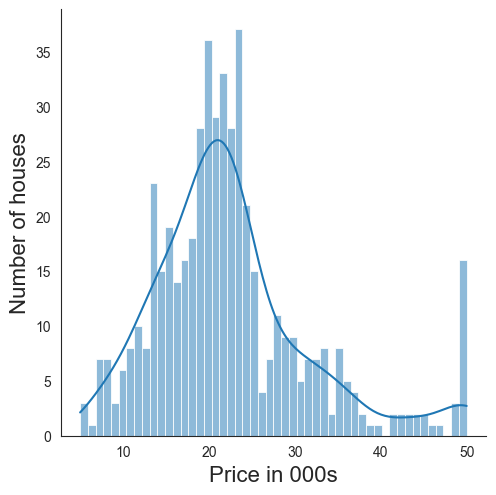

In [43]:
# kde means probability density function(line on the top of histagram)
plt.figure(figsize=(10, 6))

sns.displot(data["PRICE"], bins=50, kde=True)
plt.xlabel("Price in 000s", fontsize=16)
plt.ylabel("Number of houses", fontsize=16)

plt.show()


<Figure size 1000x600 with 0 Axes>

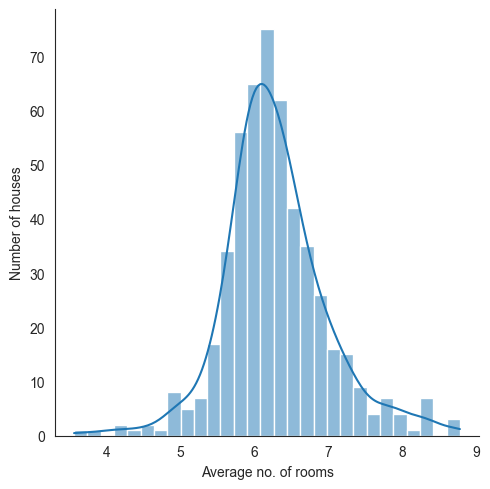

In [44]:
plt.figure(figsize=(10, 6))

sns.displot(data["RM"], kde=True)
plt.xlabel("Average no. of rooms")
plt.ylabel("Number of houses")

plt.show()


In [45]:
data["RM"].mean()


6.284634387351779

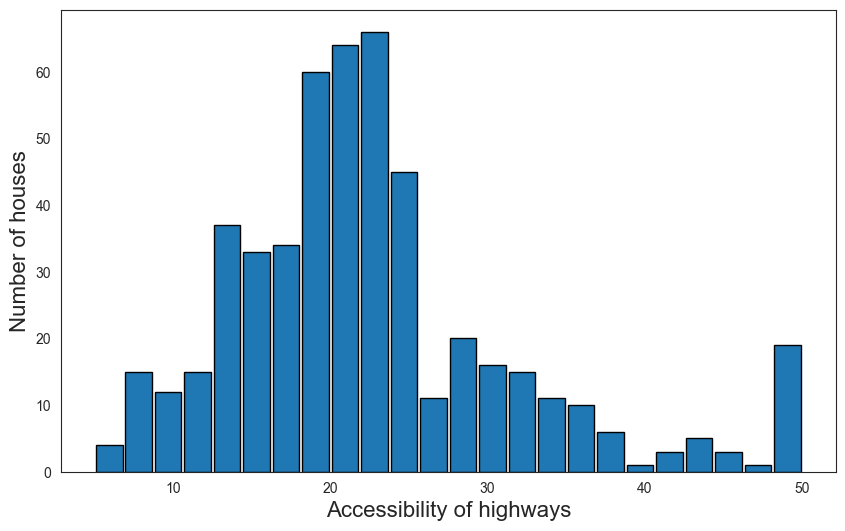

In [46]:
plt.figure(figsize=(10, 6))

# nbins is set to 24 because rad has index ranging from 1 to 24 which is like rating for the accessibility of the highway
plt.hist(data["PRICE"], bins=24, rwidth=0.9, ec="black")
plt.xlabel("Accessibility of highways", fontsize=16)
plt.ylabel("Number of houses", fontsize=16)

plt.show()


In [47]:
# This shows us how many values are associated with a value
data["RAD"].value_counts()


24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

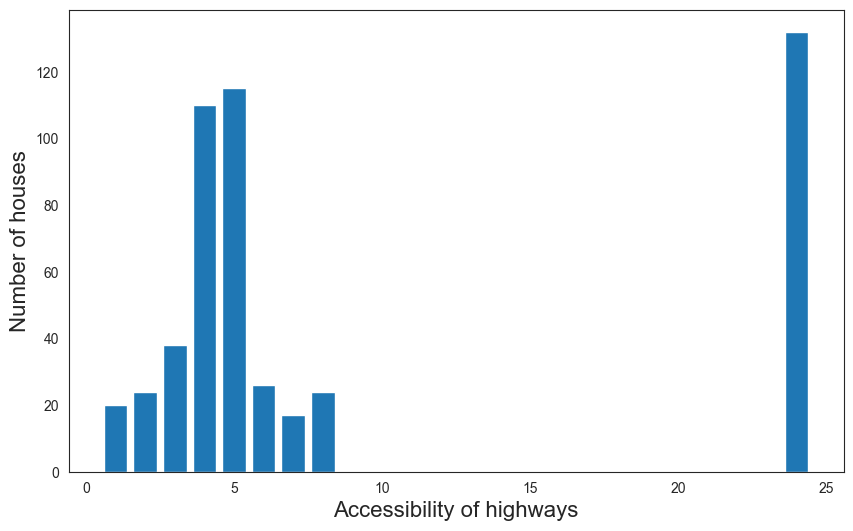

In [48]:
# in such contexts where index is given it is better to draw bar charts rather than hard coding bins like 24 in this case
frequency = data["RAD"].value_counts()
# type(frequency)
# These two are similar thihngs:
# frequency.index
# frequency.axes[0]

plt.figure(figsize=(10, 6))
plt.xlabel("Accessibility of highways", fontsize=16)
plt.ylabel("Number of houses", fontsize=16)

plt.bar(frequency.axes[0], height=frequency)
plt.show()


In [49]:
data["CHAS"].value_counts()


0.0    471
1.0     35
Name: CHAS, dtype: int64

In [50]:
data.describe()


CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Correlation

#### $$ \rho\_{XY}=corr(X,Y)$$

#### $$ -1.0 \leq \rho \_{XY} \leq 1.0 $$


In [51]:
print(
    "Correlation between house prices and number of rooms:  ",
    data["PRICE"].corr(data["RM"]),
)

print(
    "Correlation between house prices and pupil teacher ratio:  ",
    data["PRICE"].corr(data["PTRATIO"]),
)


Correlation between house prices and number of rooms:   0.6953599470715396
Correlation between house prices and pupil teacher ratio:   -0.5077866855375618


In [52]:
# All correlation at the same time:
data.corr()  # pearson correlation : standard correlation coefficient


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [53]:
mask = np.zeros_like(data.corr())  # masks 0 ;like values
triangle_indices = np.triu_indices_from(mask)  # forms a triangle of 1s and zeros
mask[triangle_indices] = True


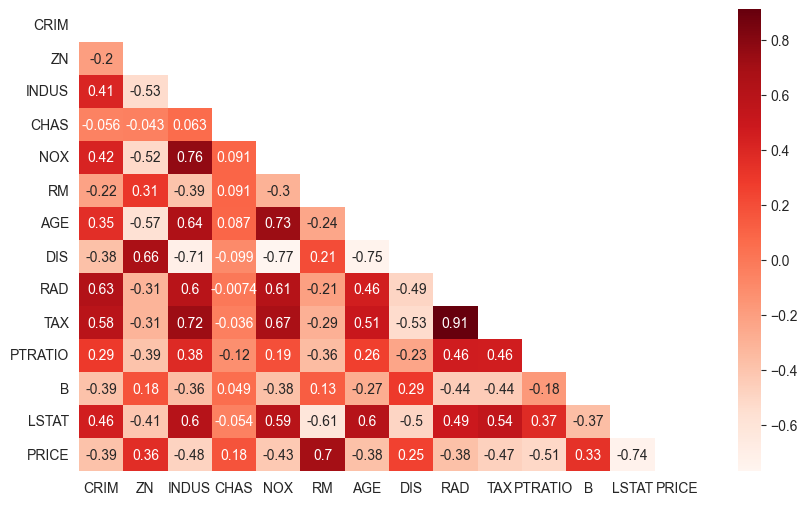

In [54]:
plt.figure(figsize=(10, 6))
# sns.heatmap(data.corr()) # shows the realtion in a heatmap
sns.heatmap(
    data.corr(), mask=mask, annot=True, annot_kws={"size": 10}, cmap="Reds"
)  # masks out the reprated values namely false in masked case in upper cell
sns.set_style("white")  # If the bg of heatmap is not white
plt.xticks(fontsize=10)  # Font for the labels of the charts
plt.yticks(fontsize=10)


plt.show()


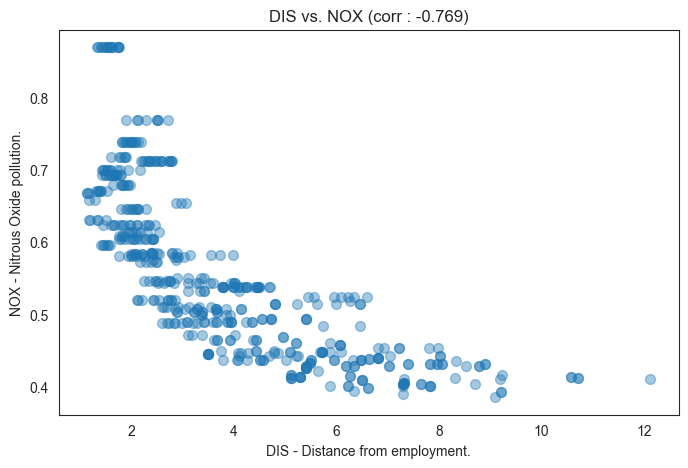

In [55]:
plt.figure(figsize=(8, 5))
cor = round(data["DIS"].corr(data["NOX"]), 3)

plt.title(f"DIS vs. NOX (corr : {cor})")
plt.scatter(x=data["DIS"], y=data["NOX"], alpha=0.4, s=50)
plt.xlabel("DIS - Distance from employment.")
plt.ylabel("NOX - Nitrous Oxide pollution.")
plt.show()


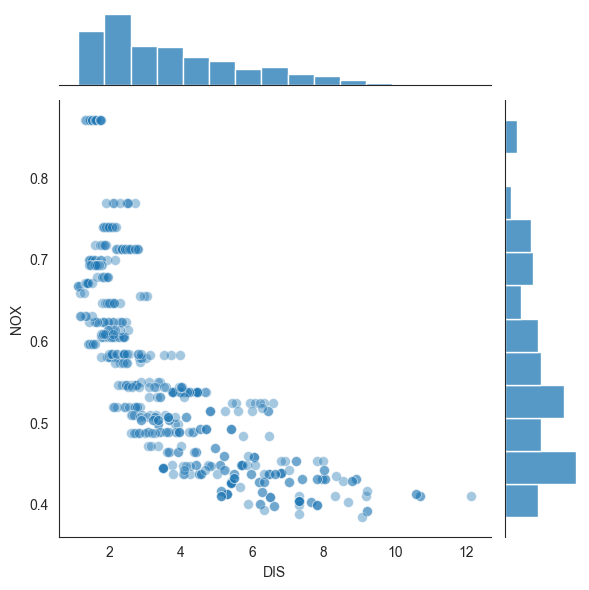

In [56]:
# We can draw the exact chart using seaborn but easily

sns.jointplot(x=data["DIS"], y=data["NOX"], joint_kws={"alpha": 0.4}, s=50)

plt.show()


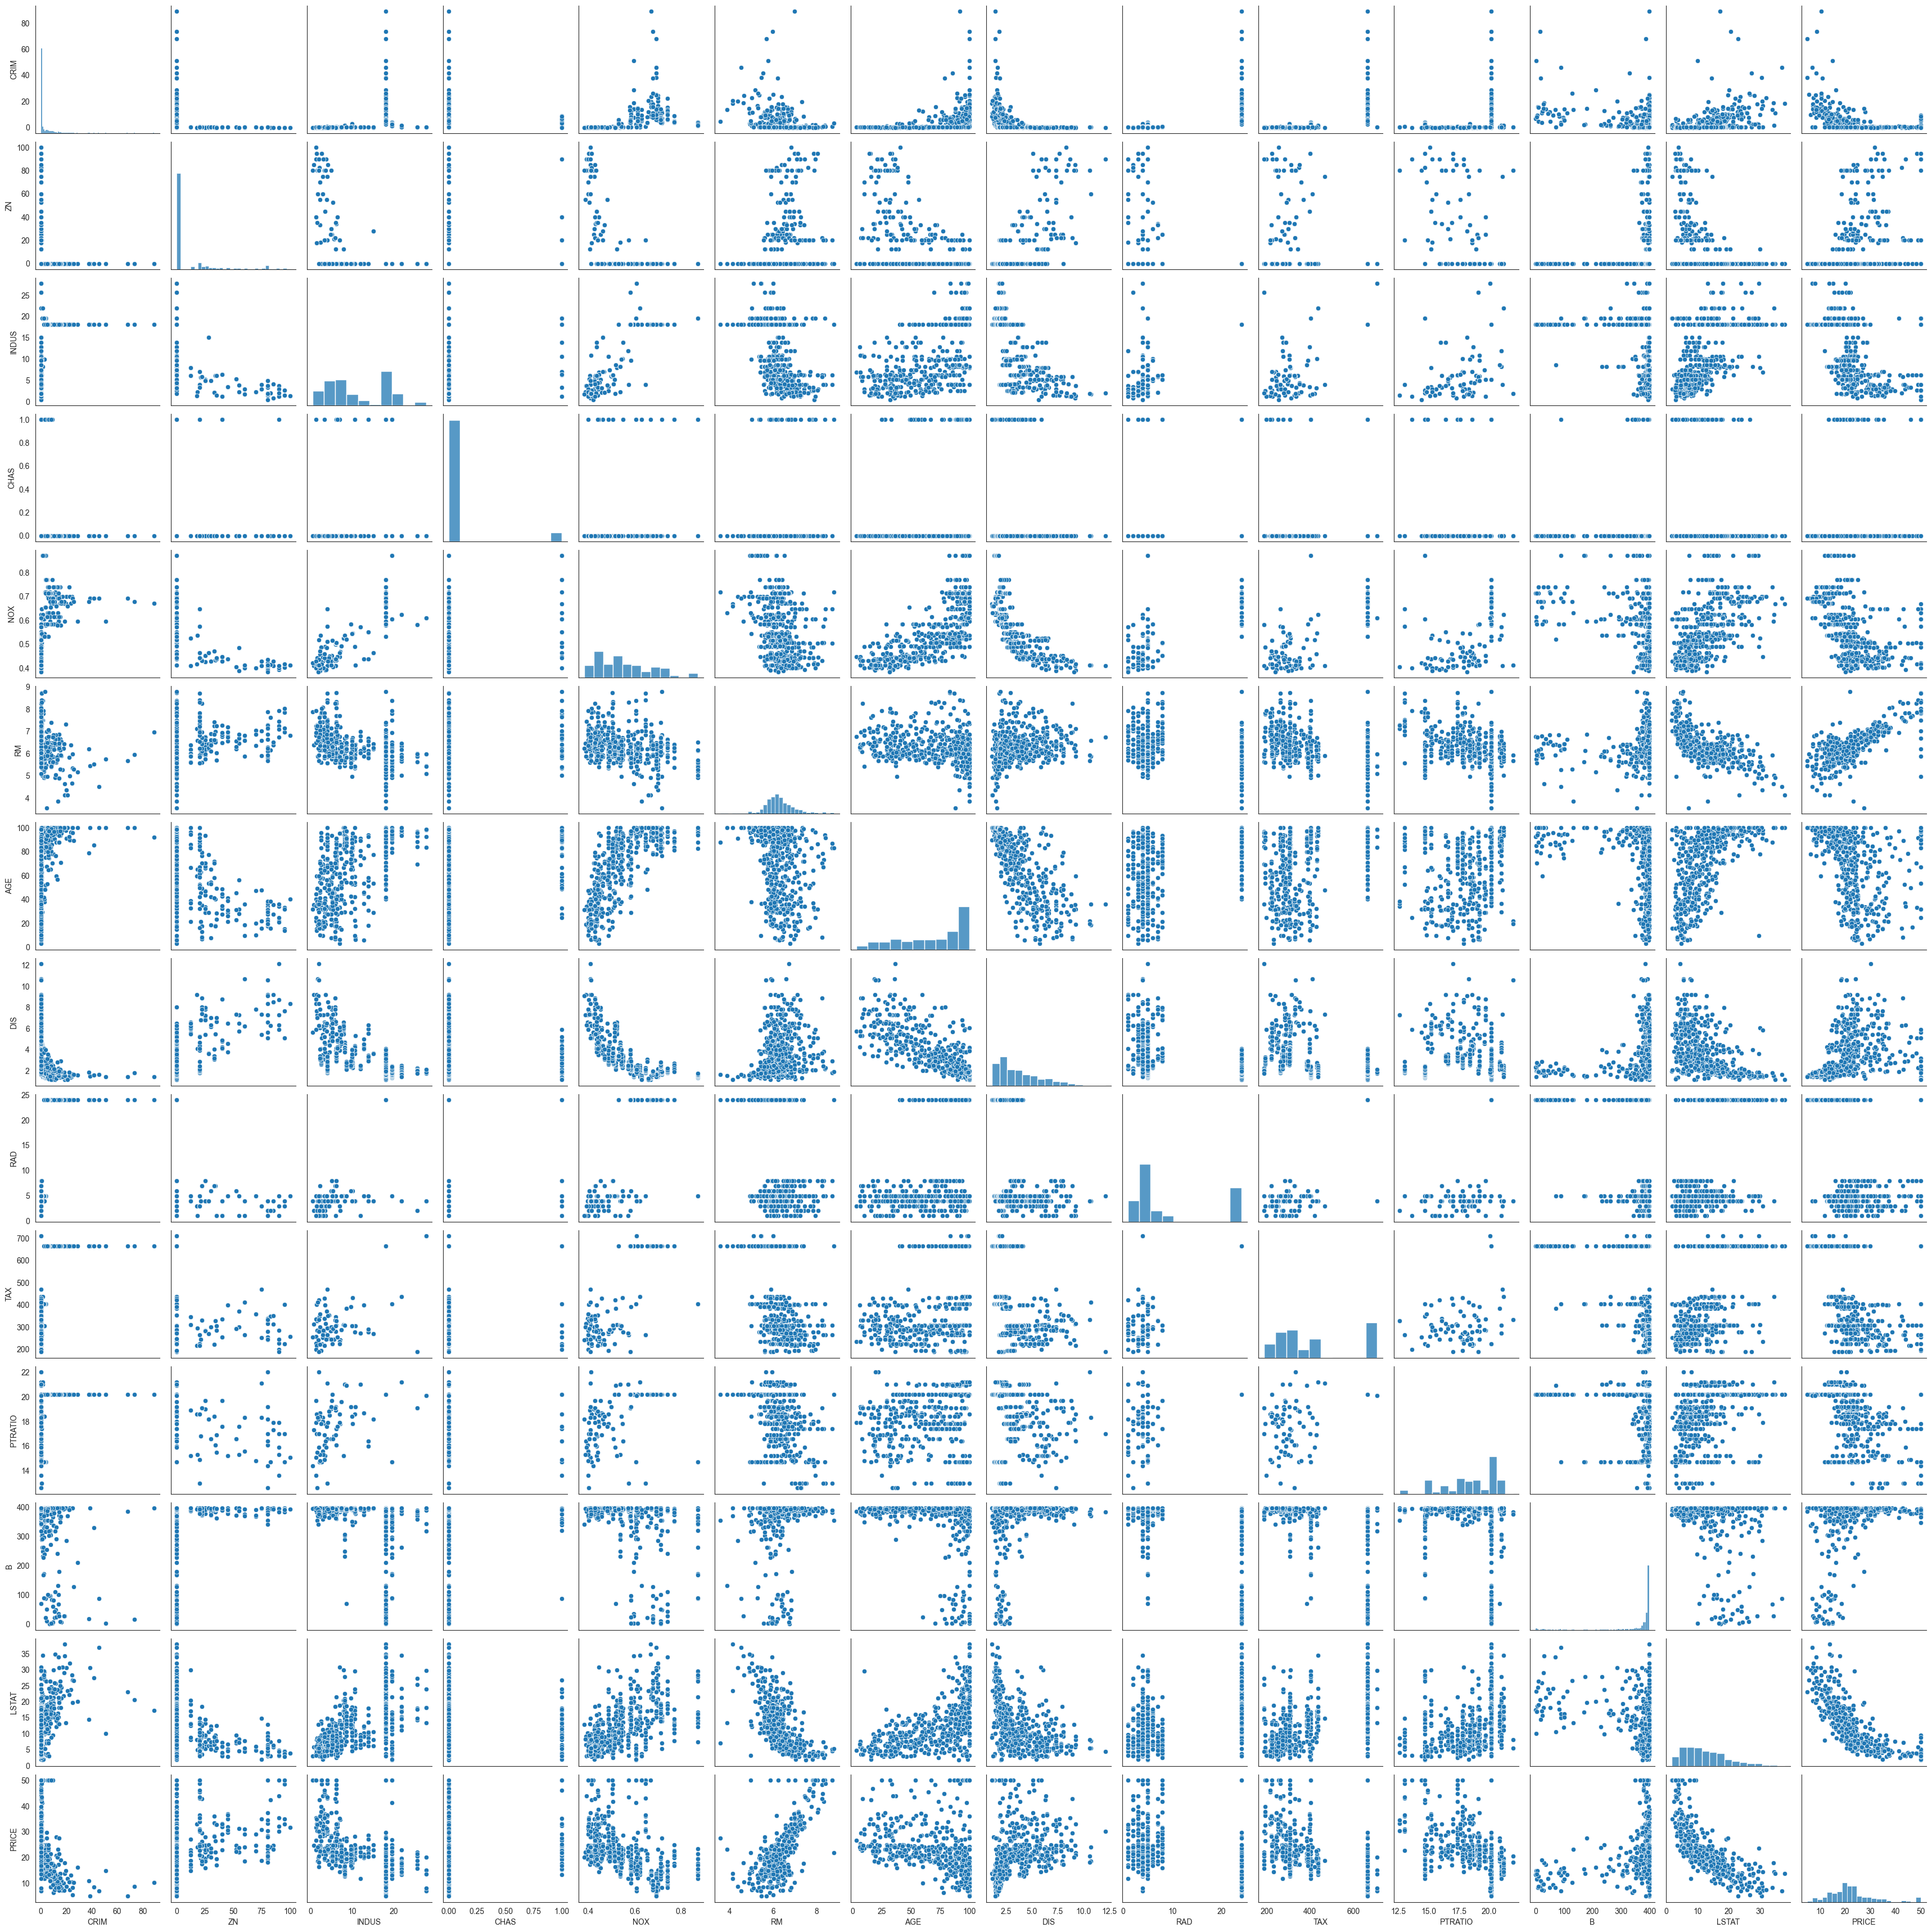

In [57]:
# plotting all the correlations
sns.pairplot(data)
plt.show()


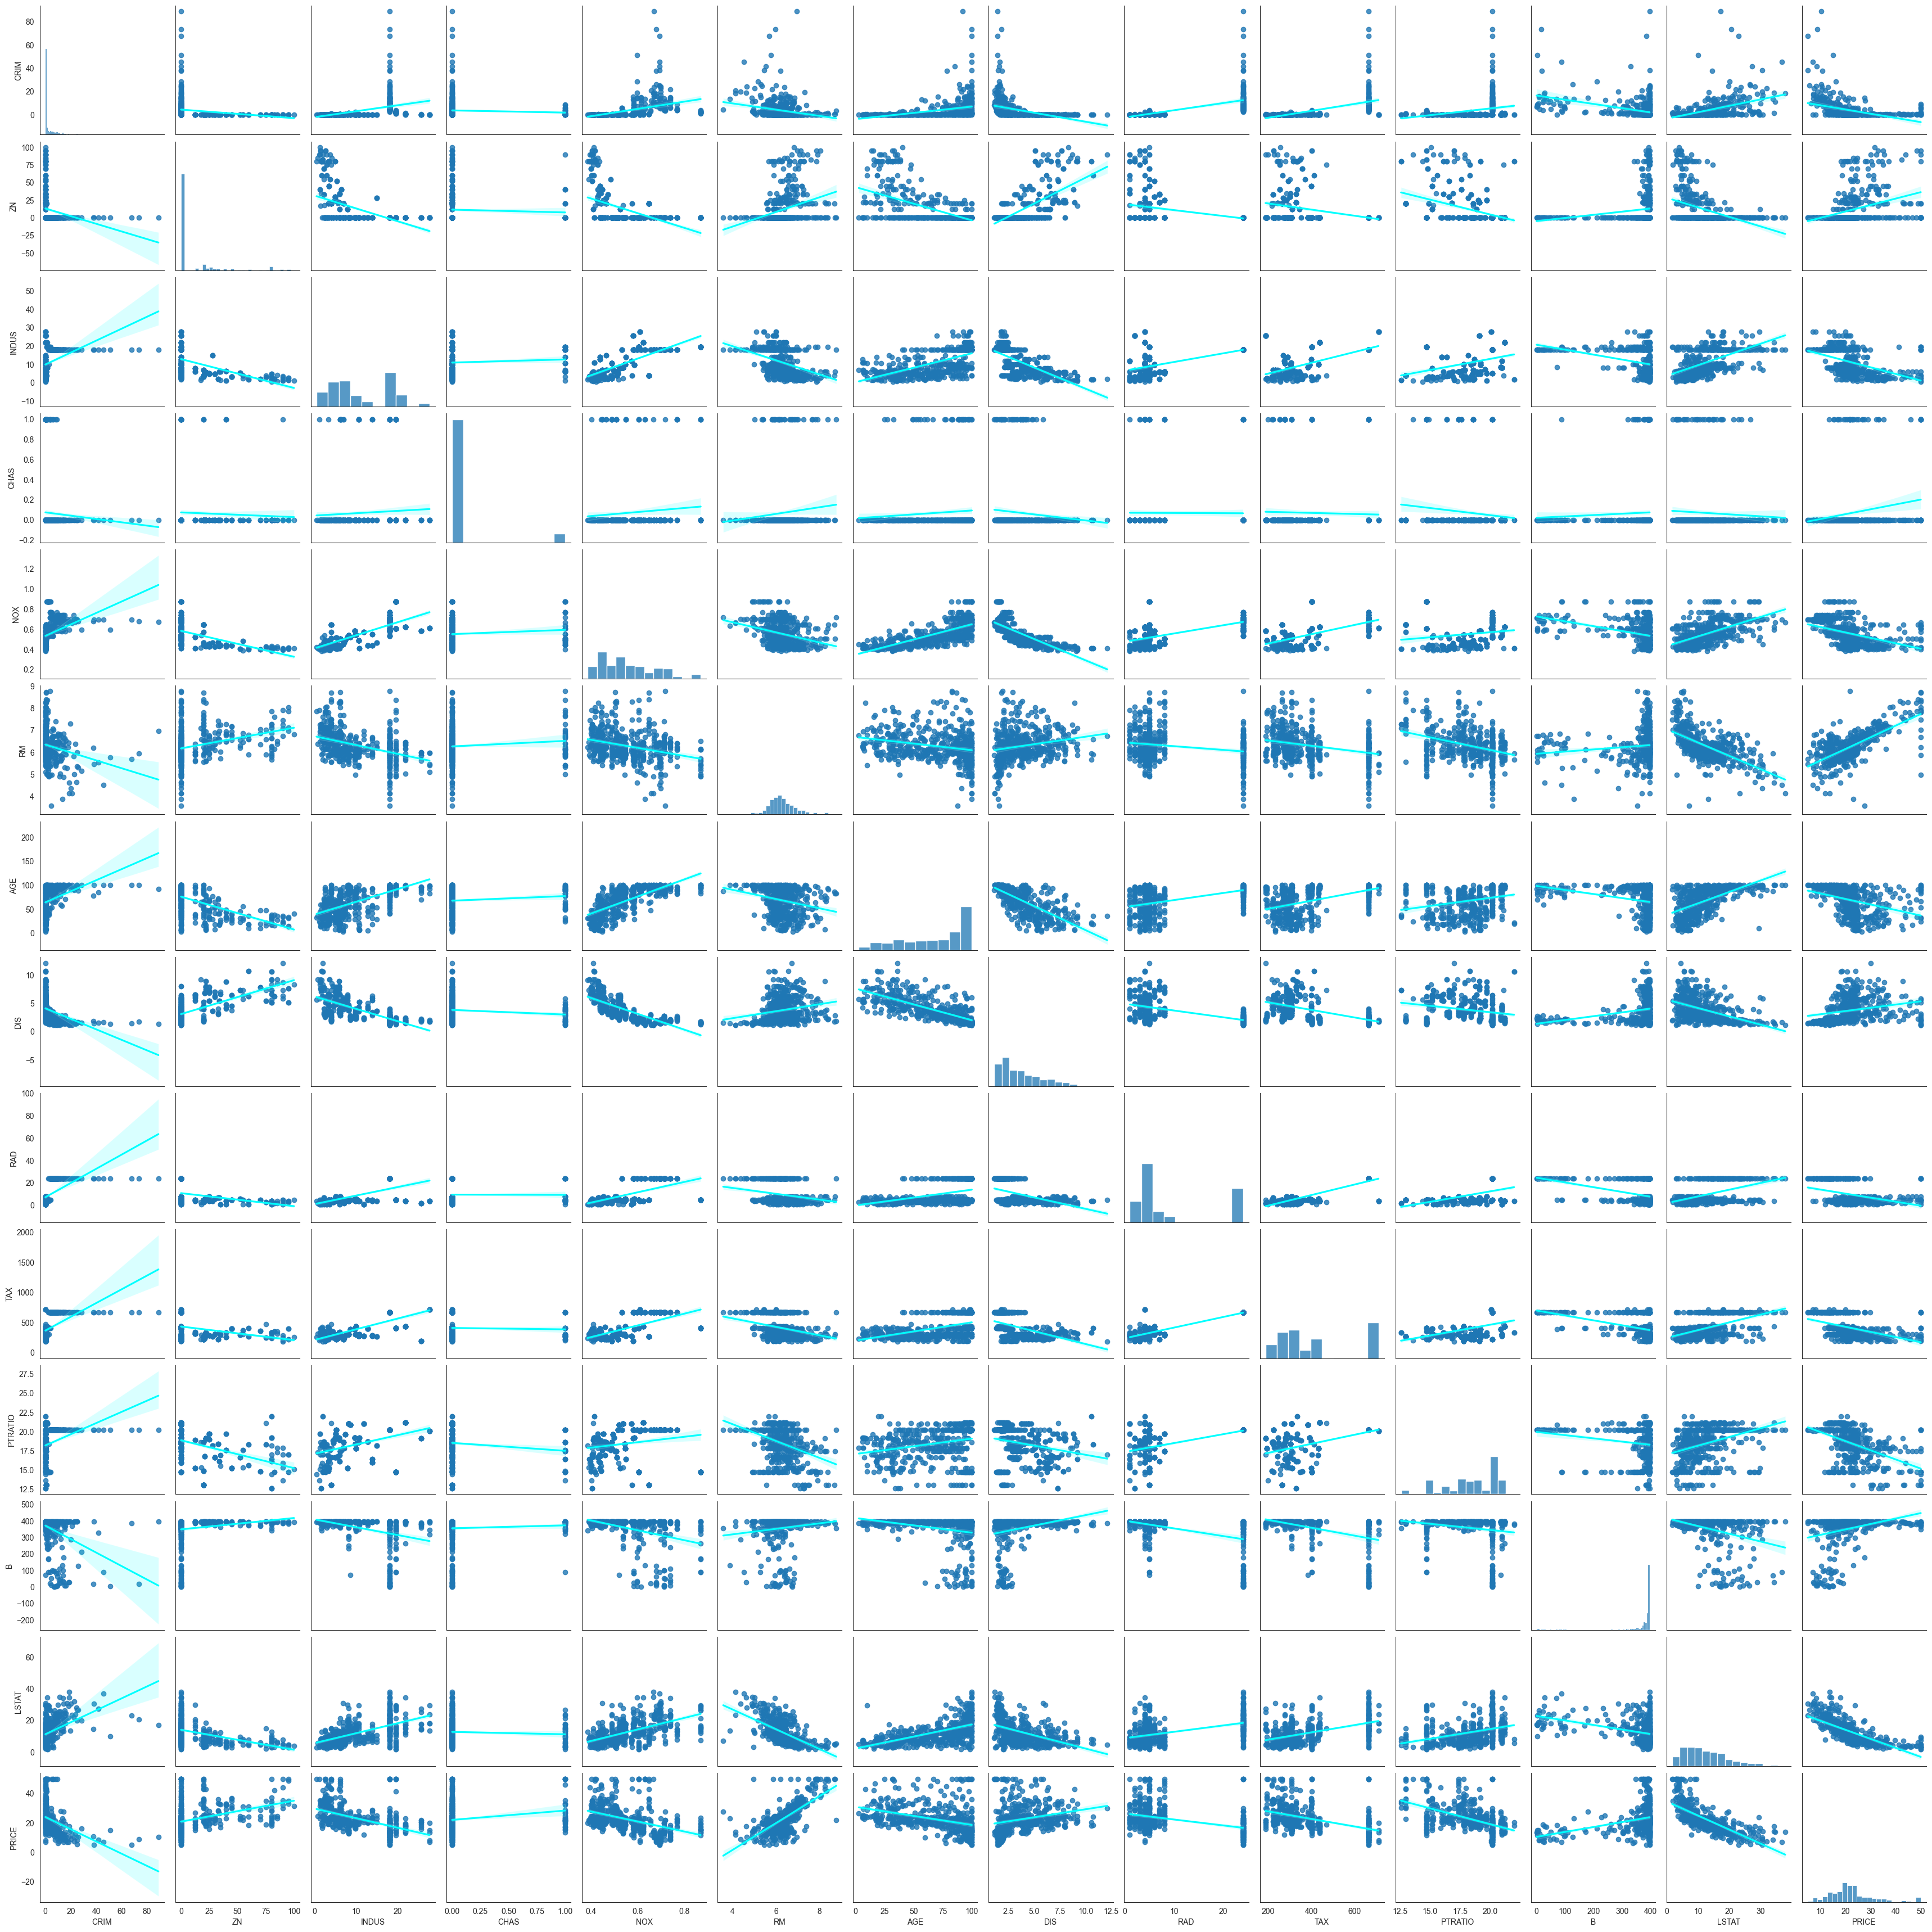

In [58]:
# plotting regression line on the correlation
sns.pairplot(data, kind="reg", plot_kws={"line_kws": {"color": "cyan"}})
plt.show()


In [59]:
price = data["PRICE"]
features = data.drop("PRICE", axis=1)

print("Intercept: ", regr.intercept_)
X_train, X_test, y_train, y_test = train_test_split(
    features, price, test_size=0.2, random_state=10
)


NameError: name 'regr' is not defined

### Multivariable Regression


In [ ]:
# chhecking the coeff to see if the feature affects the price in a
# good or a bad way
# Positive value means price is higher in such circumstances
# and negative means the price is low.
regr = LinearRegression()
regr.fit(X_train, y_train)

print("Training data r-squared: ", regr.score(X_train, y_train))
print("Test data r-squared: ", regr.score(X_test, y_test))

print("Intercept: ", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coeff"])  # type: ignore


Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115628
Intercept:  36.5330513828241


coeff
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [ ]:
print("Skew in normal price: ", data["PRICE"].skew())
print("skew in log pricee: ", np.log(data["PRICE"]).skew())
# here we can already see hte skew is decreasing using the log for the prices of houses.
# skew means the higher peak on the very righht of theh histagram irralative to the normal histagram.


Skew in normal price:  1.1080984082549072
skew in log pricee:  -0.33032129530987864


### By plotting the values of prices in log we can fit our model even better(observe the increased r-squared vaues)


In [ ]:
price = np.log(
    data["PRICE"]
)  # using log price instead of normal price to reduce the skew
features = data.drop("PRICE", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, price, test_size=0.2, random_state=10
)


regr = LinearRegression()
regr.fit(X_train, y_train)

print("Training data r-squared: ", regr.score(X_train, y_train))
print("Test data r-squared: ", regr.score(X_test, y_test))

print("Intercept: ", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coeff"])  # type: ignore


Training data r-squared:  0.7930234826697584
Test data r-squared:  0.744692230626071
Intercept:  4.059943871775174


coeff
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [ ]:
# Charels river property premium:
# Chhanging the log value from the above chart to real value in thousands
# It shows that house price is 1.8k higher near river charles
np.e**0.08047


1.0837963322645696

### testing for multicollinearity:

##### $$ TAX = \alpha _0 + \alpha \_1 RM + \alpha \_2 NOX + ...+ \alpha _{12}LSTAT $$

##### $$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$


#### p values and evaluatingg coefficients:

##### pvalue > 0.05 ---> non significant

##### pvalues < 0.05 ---> significant


In [ ]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

results.params  # shows the coff
results.pvalues  # shows the p values

pd.DataFrame({"coef": results.params, "pvalues": round(results.pvalues, 3)})


coef  pvalues
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

##### Here INDUS(0.445) and AGE(0.209) have pvales > 0.05 so they are insignificant and can be removed


In [ ]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)  # type: ignore


1.7145250443932485

In [ ]:
# Number of colums in the dataframe: (2 methods)
len(X_incl_const.columns)  # type: ignore
X_incl_const.shape[1]


14

In [ ]:
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))  # type: ignore
print("\ndone!!!")


597.5487126763895
1.7145250443932485
2.3328224265597597
3.9434488226746396
1.0788133385000576
4.410320817897635
1.8404053075678573
3.3267660823099408
4.222923410477865
7.314299817005065
8.508856493040817
1.8399116326514064
1.3386713255364715
2.812544292793036

done!!!


In [ ]:
# storing this in a list
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))  # type: ignore
print(vif)


[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.9434488226746396, 1.0788133385000576, 4.410320817897635, 1.8404053075678573, 3.3267660823099408, 4.222923410477865, 7.314299817005065, 8.508856493040817, 1.8399116326514064, 1.3386713255364715, 2.812544292793036]


In [ ]:
# we can do above thing also as :
vif = [
    variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
    for i in range(X_incl_const.shape[1])
]

pd.DataFrame({"coef_name": X_incl_const.columns, "vif": np.around(vif, 2)})


coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

### Model Simplification and BIC(Baisen Info Criteria)


In [ ]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


org_coef = pd.DataFrame({"coef": results.params, "pvalues": round(results.pvalues, 3)})
print("BIC is : ", results.bic)
print("r-squared is : ", results.rsquared)


BIC is :  -139.74997769478898
r-squared is :  0.7930234826697584


In [ ]:
# Reduced model removing INDUS features looking at its high p value than satisfactory

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


coef_minus_indus = pd.DataFrame(
    {"coef": results.params, "pvalues": round(results.pvalues, 3)}
)
print("BIC is : ", results.bic)
print("r-squared is : ", results.rsquared)


BIC is :  -145.1450885559114
r-squared is :  0.7927126289415163


We can see that the bic has further dedcreased and r squared hasnot changed a lot so it can be removed.


In [ ]:
# Reduced model removing INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS", "AGE"], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


reduced_coef = pd.DataFrame(
    {"coef": results.params, "pvalues": round(results.pvalues, 3)}
)
print("BIC is : ", results.bic)
print("r-squared is : ", results.rsquared)


BIC is :  -149.49934294224656
r-squared is :  0.7918657661852815


bic has further decreased and there is not much change in r-squared value so we can also remove age and there will be not much of an effect as we see of now.


In [ ]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)


coef  pvalues      coef  pvalues      coef  pvalues
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

Here, NAN means not a number which is because we removed those features from out dataset.
As we can see the coefs before and after removing those features haven't changed a lot so we are safe on removing those features.


### Residuals and residuals price:

Residual is the difference between the given value and predicted value


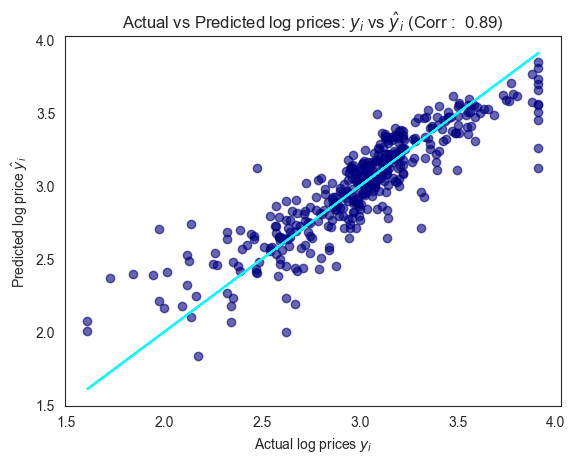

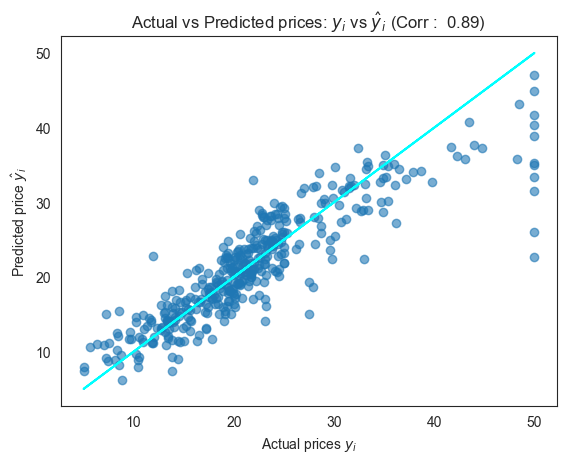

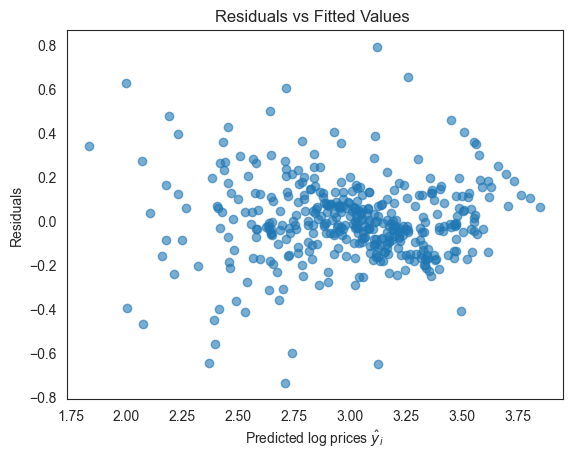

In [64]:
# Modified model: Transformed using log prices & simplified dropping 2 features namely INDUS and AGE
price = np.log(
    data["PRICE"]
)  # using log price instead of normal price to reduce the skew
features = data.drop(["PRICE", "INDUS", "AGE"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    features, price, test_size=0.2, random_state=10
)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


# Residuals
# residuals=y_train-results.fittedvalues # gives all the residuals
# residuals.describe() # decribe the residuals
# results.resid.describe() # does the same thing in a simple way

# Graph of Actual vs. predicted prices:
corr = round(y_train.corr(results.fittedvalues), 2)

plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, c="cyan")

plt.xlabel("Actual log prices $y _i$")
plt.ylabel("Predicted log price $\hat y _i$")
plt.title(f"Actual vs Predicted log prices: $y _i$ vs $\hat y _i$ (Corr :  {corr}) ")

plt.show()

# Plotting the actual prices vs predicted priceces
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, c="cyan")

plt.xlabel("Actual prices $y _i$")
plt.ylabel("Predicted price $\hat y _i$")
plt.title(f"Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr :  {corr}) ")

plt.show()


# Residuals vs predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6)

plt.xlabel("Predicted log prices $\hat y _i$")
plt.ylabel("Residuals")
plt.title(f"Residuals vs Fitted Values ")

plt.show()

# Mean squared error and R-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)


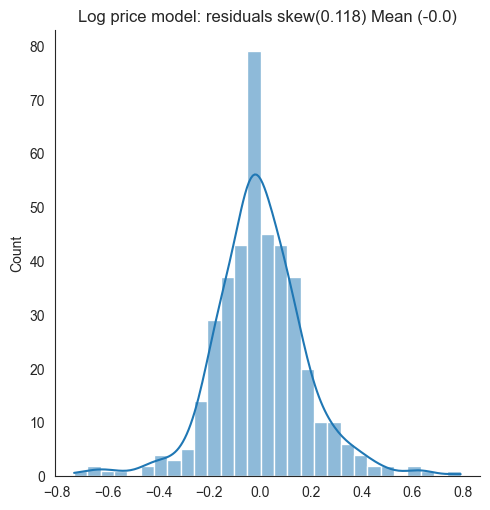

In [65]:
# Distribution of REsiduals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, kde=True)  # kde means that line
plt.title(f"Log price model: residuals skew({resid_skew}) Mean ({resid_mean})")
plt.show()


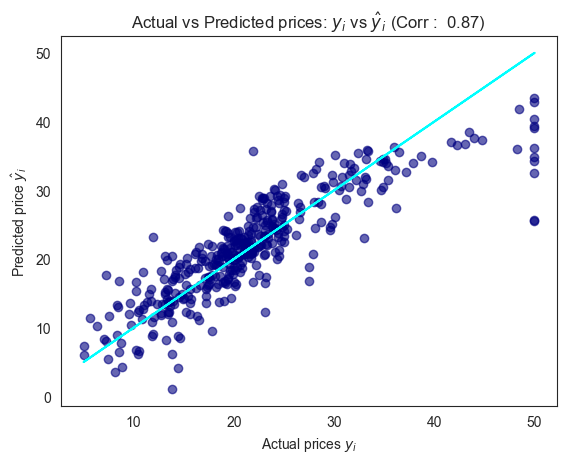

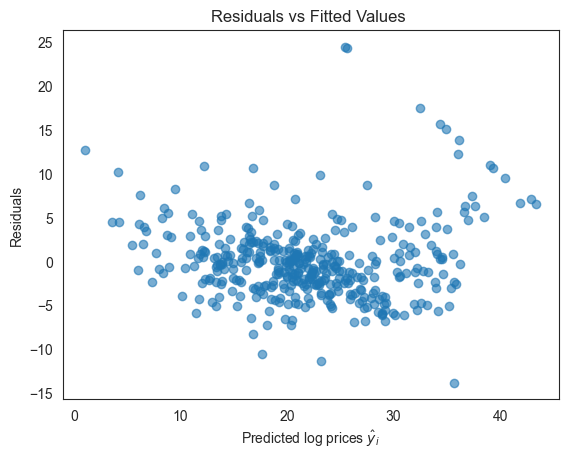

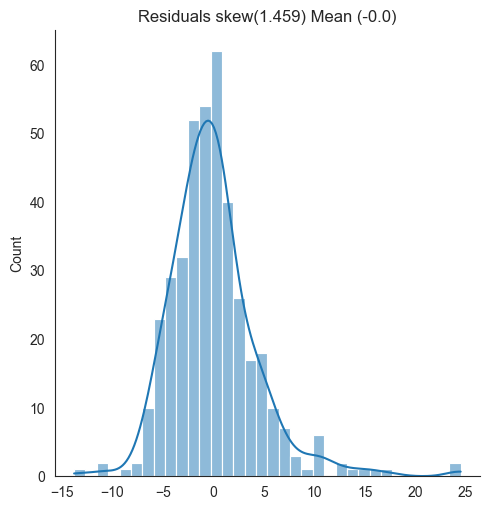

In [66]:
# With all the details included.
price = data["PRICE"]
features = data.drop("PRICE", axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    features, price, test_size=0.2, random_state=10
)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


corr = round(y_train.corr(results.fittedvalues), 2)

plt.scatter(x=y_train, y=results.fittedvalues, c="navy", alpha=0.6)
plt.plot(y_train, y_train, c="cyan")

plt.xlabel("Actual prices $y _i$")
plt.ylabel("Predicted price $\hat y _i$")
plt.title(f"Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr :  {corr}) ")

plt.show()


# Residuals vs predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, alpha=0.6)

plt.xlabel("Predicted log prices $\hat y _i$")
plt.ylabel("Residuals")
plt.title(f"Residuals vs Fitted Values ")

plt.show()


# Distribution of REsiduals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, kde=True)  # kde means that line
plt.title(f"Residuals skew({resid_skew}) Mean ({resid_mean})")
plt.show()

# Mean squared error and R-squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)


In [69]:
pd.DataFrame(
    {
        "R-squared": [full_normal_rsquared, reduced_log_rsquared],
        "MSE": [full_normal_mse, reduced_log_mse],
        "RMSE" : [np.sqrt(full_normal_mse), np.sqrt(reduced_log_mse)],
    },
    index=["Full model", "Reduced log model"],
)


R-squared     MSE      RMSE
Full model             0.750  19.921  4.463295
Reduced log model      0.792   0.035  0.187083

## Challange:
##### For a house price of $ 30,000 calculate teh upper and the lower bound for a 95% preddection interval using the reduces log model.

In [74]:
print("1 s.d. in log prices is : ", np.sqrt(reduced_log_mse))
print("2 s.d. in log prices is : ", 2 * np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2 * np.sqrt(reduced_log_mse)
print("\nUpper bound(log) for 30k is : ", upper_bound)
print("Upper bound for 30k is $: ", np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2 * np.sqrt(reduced_log_mse)
print("\nLower bound(log) for 30k is : ", lower_bound)
print("Lower bound for 30k is $: ", np.e**lower_bound * 1000)


1 s.d. in log prices is :  0.18708286933869708
2 s.d. in log prices is :  0.37416573867739417

Upper bound(log) for 30k is :  3.7753631203395495
Upper bound for 30k is $:  43613.34233239937

Lower bound(log) for 30k is :  3.0270316429847615
Lower bound for 30k is $:  20635.886906824155


In [76]:
# the wrong way to do it:
30000 + np.e ** (2 * np.sqrt(reduced_log_mse)) * 1000


31453.778077746647